In [1]:
import squidpy as sq
import scanpy as sc
import pandas as pd
import numpy as np

/home/dbdimitrov/anaconda3/lib/python3.8/site-packages/paramiko/transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
import liana as li

In [3]:
from matplotlib.pyplot import hist

In [4]:
# load the pre-processed dataset
img = sq.datasets.visium_hne_image()
adata = sq.datasets.visium_hne_adata()

In [5]:
li.mt.get_spatial_proximity(adata=adata, parameter=200, bypass_diagonal=False, cutoff=0.2)

In [6]:
my_plot = li.pl.proximity_plot(adata, idx=100)

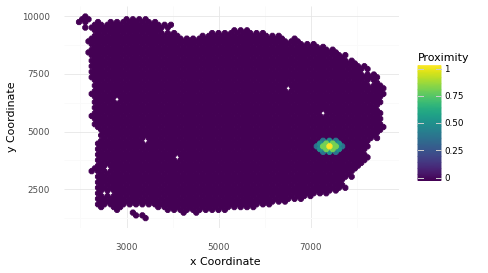

<ggplot: (8750209409043)>

In [7]:
my_plot

In [8]:
from liana.method.sp._spatialdm import spatialdm

In [9]:
spatialdm(adata=adata, resource_name="MouseConsensus", pvalue_method='analytical', verbose=True, use_raw=False)

Using `.X`!


In [10]:
from liana.method._global_lr_pipe import _global_lr_pipe
from liana.method.sp._spatialdm import _get_ordered_matrix, _standardize_matrix

In [11]:
temp, lr_res, ligand_pos, receptor_pos = _global_lr_pipe(adata=adata,
                                                         resource_name="MouseConsensus",
                                                         expr_prop=0.05,
                                                         use_raw=False,
                                                         verbose=True,
                                                         layer=None,
                                                         resource=None,
                                                         _key_cols=['ligand_complex', 'receptor_complex'],
                                                         _complex_cols=['ligand_means', 'receptor_means'],
                                                         _obms_keys=['proximity']
                                                         )

Using `.X`!


In [20]:
temp.var

,gene_ids,feature_types,genome,mt,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,n_cells,highly_variable,highly_variable_rank,means,variances,variances_norm
A2m,ENSMUSG00000030111,Gene Expression,mm10,False,322,0.219792,0.198681,88.065234,593.0,6.386879,322,True,365.0,0.220610,0.765976,2.669456
Abca1,ENSMUSG00000015243,Gene Expression,mm10,False,935,0.459229,0.377908,65.344700,1239.0,7.122867,935,False,NaN,0.460938,0.539597,0.827133
Ace,ENSMUSG00000020681,Gene Expression,mm10,False,625,0.532987,0.427218,76.834692,1438.0,7.271704,624,True,38.0,0.534598,6.723775,8.764008
Ackr2,ENSMUSG00000044534,Gene Expression,mm10,False,89,0.035953,0.035321,96.701260,97.0,4.584968,89,False,NaN,0.036086,0.040752,0.937836
Ackr3,ENSMUSG00000044337,Gene Expression,mm10,False,439,0.206449,0.187682,83.728688,557.0,6.324359,439,True,3194.0,0.207217,0.293852,1.093900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wnt9b,ENSMUSG00000018486,Gene Expression,mm10,False,195,0.093032,0.088955,92.772424,251.0,5.529429,195,True,2651.0,0.093378,0.139770,1.152613
Ybx1,ENSMUSG00000028639,Gene Expression,mm10,False,2502,3.831727,1.575204,7.264640,10338.0,9.243678,2498,False,NaN,3.843750,11.167240,0.912522
Znrf3,ENSMUSG00000041961,Gene Expression,mm10,False,539,0.240178,0.215255,80.022239,648.0,6.475433,539,False,NaN,0.241071,0.282764,0.896490
Zp3,ENSMUSG00000004948,Gene Expression,mm10,False,27,0.012231,0.012157,98.999259,33.0,3.526361,27,True,2367.0,0.012277,0.016597,1.193652


In [12]:
lr_res.head()

,interaction,ligand,receptor,ligand_complex,receptor_complex,ligand_means,ligand_props,receptor_means,receptor_props,prop_min
0,Dll1&Notch1,Dll1,Notch1,Dll1,Notch1,0.037283,0.057292,0.216689,0.276786,0.057292
1,Adam10&Notch1,Adam10,Notch1,Adam10,Notch1,0.623617,0.651786,0.216689,0.276786,0.276786
2,Jag1&Notch1,Jag1,Notch1,Jag1,Notch1,0.051299,0.075893,0.216689,0.276786,0.075893
3,Adam17&Notch1,Adam17,Notch1,Adam17,Notch1,0.121026,0.167783,0.216689,0.276786,0.167783
4,Dlk1&Notch1,Dlk1,Notch1,Dlk1,Notch1,0.236641,0.213542,0.216689,0.276786,0.213542


In [13]:
x_mat = _standardize_matrix(temp.X, local=False)
y_mat = _standardize_matrix(temp.X, local=False)

In [14]:
ligand_mat = _get_ordered_matrix(x_mat, ligand_pos, lr_res.ligand)
receptor_mat = _get_ordered_matrix(y_mat, receptor_pos, lr_res.receptor)

In [15]:
dist = adata.obsm['proximity']

In [16]:
global_r = ((ligand_mat @ dist) * receptor_mat).sum(axis=1)

In [17]:
global_r

array([ 0.0786576 , -0.05555834, -0.00536108, ...,  0.11324887,
        0.08164825, -0.36794403], dtype=float32)

In [18]:
dist

<2688x2688 sparse matrix of type '<class 'numpy.float32'>'
	with 48726 stored elements in Compressed Sparse Row format>

Weighed Spearman Correlation:

In [25]:
import numpy as np
from scipy.stats import spearmanr, pearsonr, pointbiserialr, kendalltau

# Assume you have two arrays of data, x and y, and a weight array, w
x = np.array([2, 2, 3, 4, 5, 7])
y = np.array([1, 2, 3, 4, 5, 9])
w = np.array([0.1, 0.2, 0.3, 0.2, 0.2, 0.5])

In [26]:
xw = x * w
yw = y * w

In [27]:
spearmanr(x, y)

SpearmanrResult(correlation=0.9856107606091624, pvalue=0.0003090856678496655)

In [28]:
spearmanr(xw, yw)

SpearmanrResult(correlation=1.0, pvalue=0.0)

Global Correlations

In [31]:
ligand_mat = _get_ordered_matrix(temp.X, ligand_pos, lr_res.ligand)
receptor_mat = _get_ordered_matrix(temp.X, receptor_pos, lr_res.receptor)

In [32]:
x, y = ligand_mat[ligand_pos['Sema4d']], receptor_mat[receptor_pos['Plxnb3']]
w = temp.obsm['proximity']

In [33]:
xw = (x @ w).A.flatten()
yw = (y @ w).A.flatten()

In [34]:
spearmanr(xw, yw, nan_policy='omit')

SpearmanrResult(correlation=0.11729441905210375, pvalue=1.0641824431277095e-09)

In [35]:
pearsonr(xw, yw)

(0.16771258440544795, 2.073203379234801e-18)

Time to beat

In [29]:
ligand_mat = _get_ordered_matrix(temp.X, ligand_pos, lr_res.ligand)
receptor_mat = _get_ordered_matrix(temp.X, receptor_pos, lr_res.receptor)

In [30]:
xw = (ligand_mat @ w)
yw = (receptor_mat @ w)

ValueError: dimension mismatch

In [ ]:
%%time
corrs = []
for i in range(xw.shape[0]):
    corrs.append(pearsonr(xw[i,:].A.flatten(), yw[i,:].A.flatten())[0])
corrs = np.array(corrs)

In [ ]:
hist(corrs)

Re-implement correlations, One corr at a time

In [167]:
x, y = ligand_mat[ligand_pos['Sema4d']].A.flatten(), receptor_mat[receptor_pos['Plxnb3']].A.flatten()

In [168]:
weight = adata.obsm['proximity']

In [169]:
i = 1

In [170]:
weight = weight[i,:]

In [159]:
def wcor(x, y, weight):
    weight_sum = np.sum(weight)
    
    numerator = weight_sum * np.sum(weight * x * y) - np.sum(weight * x) * np.sum(weight * y)
    denominator_x = weight_sum * np.sum(weight * (x**2)) - np.sum(weight * x)**2
    denominator_y = weight_sum * np.sum(weight * (y**2)) - np.sum(weight * y)**2
    
    wcor = numerator / np.sqrt(denominator_x * denominator_y)
    
    return wcor

In [160]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7])
y = np.array([0, 1, 2, 3, 4, 5, 6, 7])
w = np.array([0.2, 0.3, 0.1, 0.2, 0.3, 0.4, 0.1, 0.2])

In [161]:
pearsonr(x, y)

(0.9999999999999998, 2.736911063134408e-47)

In [162]:
np.repeat(1, w.shape[0])

array([1, 1, 1, 1, 1, 1, 1, 1])

In [163]:
wcor(x, y, np.repeat(1, w.shape[0]))

1.0

In [130]:
weight_sum = np.sum(weight)

In [131]:
numerator = weight_sum * np.sum(weight * x * y) - np.sum(weight * x) * np.sum(weight * y)

In [132]:
denominator_x = weight_sum * np.sum(weight * (x**2)) - np.sum(w * x)**2
denominator_y = weight_sum * np.sum(weight * (y**2)) - np.sum(w * y)**2

In [133]:
wcor = numerator / np.sqrt(denominator_x * denominator_y)

In [134]:
wcor

9.036089407046753e-05

In [ ]:
weight_sum * np.sum(weight * (x**2))

4.1029506

In [ ]:
np.sum(weight * (x**2))

0.5151168

In [ ]:
nw = sum(w)
wssx = nw * sum(w * (x^2)) - sum(w * x)^2
wssy = nw * sum(w * (y^2)) - sum(w * y)^2

wssxy = nw * sum(w * x * y) - sum(w * x) * sum(w * y)

wcor = wssxy/sqrt(wssx * wssy)
wcor

Re-implement as an efficient matrix operation

In [36]:
ligand_mat = _get_ordered_matrix(temp.X, ligand_pos, lr_res.ligand)
receptor_mat = _get_ordered_matrix(temp.X, receptor_pos, lr_res.receptor)

In [37]:
corr_method = "pearson"

In [38]:
xw = (ligand_mat @ w)
yw = (receptor_mat @ w)

In [39]:
xw.shape

(1409, 2688)

In [40]:
if corr_method=='spearman':
    xw = np.asmatrix(rankdata(xw.todense(), axis=1, method="average"))
    yw = np.asmatrix(rankdata(yw.todense(), axis=1, method="average"))

In [41]:
xm = (xw - xw.mean(axis=1)).A
ym = (yw - yw.mean(axis=1)).A

In [42]:
numerator = np.sum(xm * ym, axis=1)

In [43]:
denumerator = np.sqrt((np.sum(np.power(xm, 2), axis=1) * np.sum(np.power(ym, 2), axis=1)))

In [44]:
corrs = numerator / denumerator

(array([ 11.,  43., 130., 279., 468., 256., 121.,  66.,  28.,   7.]),
 array([-0.53516597, -0.39648888, -0.2578118 , -0.11913473,  0.01954235,
         0.15821943,  0.29689652,  0.43557358,  0.57425064,  0.71292776,
         0.8516048 ], dtype=float32),
 <BarContainer object of 10 artists>)

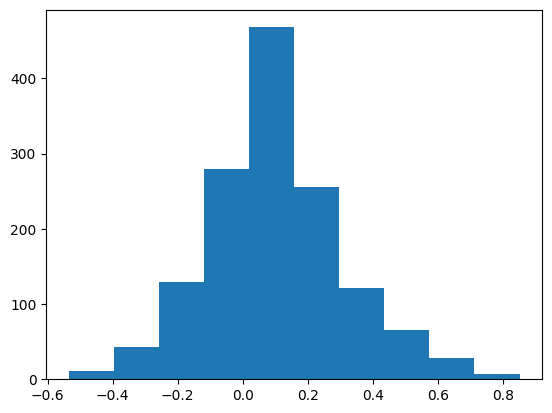

In [45]:
hist(corrs)

Compare to Global Moran's I

In [46]:
adata.uns['global_res'][corr_method] = corrs

In [47]:
spearmanr(adata.uns['global_res']['global_r'], adata.uns['global_res'][corr_method])

SpearmanrResult(correlation=0.9095009278189768, pvalue=0.0)

In [48]:
adata.uns['global_res'].sort_values('pearson')

,interaction,ligand,receptor,ligand_complex,receptor_complex,ligand_means,ligand_props,receptor_means,receptor_props,prop_min,global_r,global_pvals,pearson
1457,Agt&Mas1,Agt,Mas1,Agt,Mas1,1.153787,0.687128,0.136406,0.172619,0.172619,-0.250330,1.000000e+00,-0.535166
1714,Gstm7&Ryr2,Gstm7,Ryr2,Gstm7,Ryr2,0.389403,0.427455,0.562664,0.577381,0.427455,-0.149239,1.000000e+00,-0.520917
1731,Gad1&Grm4,Gad1,Grm4,Gad1,Grm4,1.216953,0.765997,0.246194,0.273065,0.273065,-0.219241,1.000000e+00,-0.508110
1028,Fgf13&Fgfr2,Fgf13,Fgfr2,Fgf13,Fgfr2,1.067480,0.825893,0.460559,0.448289,0.448289,-0.207962,1.000000e+00,-0.479385
1031,Fgf14&Fgfr2,Fgf14,Fgfr2,Fgf14,Fgfr2,0.232907,0.320312,0.460559,0.448289,0.320312,-0.108398,1.000000e+00,-0.445008
...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,Psap&Lrp1,Psap,Lrp1,Psap,Lrp1,3.318095,0.999628,1.529206,0.946801,0.946801,0.071031,1.419232e-50,0.732180
182,Jam3&Itgb1,Jam3,Itgb1,Jam3,Itgb1,0.480654,0.491071,0.532951,0.571057,0.491071,0.168867,1.647485e-275,0.757978
550,App&Aplp2,App,Aplp2,App,Aplp2,3.040105,0.998140,2.031858,0.985119,0.985119,0.156871,4.334632e-238,0.793444
752,App&Aplp1,App,Aplp1,App,Aplp1,3.040105,0.998140,3.126448,0.999628,0.998140,0.170196,8.013167e-280,0.835961


Local Correlations

One correlation at a time

In [ ]:
# define x and y
x = ligand_mat[0, :].A
y = receptor_mat[0, :].A

In [ ]:
x.shape

In [ ]:
y.shape

In [ ]:
# spatially-weigh them
xw = (x @ w)
yw = (y @ w)
# check if I'm multiplying by weight twice (i.e. necessarily), likely I fuck up here

In [ ]:
# think about ranking

In [ ]:
np.sum((x * y).T * w[0,:])*np.sum(w[0,:]) - np.sum(w[0,:]*x.T)*np.sum(w[0,:]*y.T)

In [ ]:
xw.shape

In [ ]:
(x @ w).shape

In [ ]:
# normalize by self mean
xm = (xw - xw.mean())
ym = (yw - yw.mean())

In [ ]:
(xm * ym).shape

In [ ]:
# calculate local corrs
numerator = (xm * ym)
denumerator_x = np.power(xm, 2).T
denumerator_y =  np.sum(np.power(ym, 2))
denumerator = np.sqrt(denumerator_x * denumerator_y)

In [ ]:
denumerator_x

In [ ]:
local_corrs = (numerator.T / denumerator)

In [ ]:
hist(local_corrs)

Re-implement global to local

In [ ]:
# showcase moran's I
local_r = li.ut.obsm_to_adata(adata, obsm_key='local_r')
sc.pl.spatial(local_r, color=['Sema4d&Plxnb3'])

In [ ]:
from liana.method.sp._spatialdm import _local_to_dataframe

In [ ]:
ligand_mat = _get_ordered_matrix(temp.X, ligand_pos, lr_res.ligand)
receptor_mat = _get_ordered_matrix(temp.X, receptor_pos, lr_res.receptor)

In [ ]:
corr_method = "pearson"

From here on as local:

In [ ]:
xw = (ligand_mat @ w)
yw = (receptor_mat @ w)

In [ ]:
xm = (xw - xw.mean(axis=1)).A
ym = (yw - yw.mean(axis=1)).A

In [ ]:
if corr_method=='spearman':
    xw = np.asmatrix(rankdata(xw.todense(), axis=1, method="average"))
    yw = np.asmatrix(rankdata(yw.todense(), axis=1, method="average"))
    # x I{ w  > 0 }

In [ ]:
numerator = (xm * ym)
denumerator_x = np.power(xm, 2).T
denumerator_y =  np.sum(np.power(ym, 2), axis=1)
denumerator = np.sqrt(denumerator_x * denumerator_y)

In [ ]:
numerator.shape

In [ ]:
denumerator.shape

In [ ]:
numerator

In [ ]:
denumerator

In [ ]:
local_corrs = numerator / denumerator.T

In [ ]:
local_corrs

In [ ]:
local_corrs = _local_to_dataframe(array=local_corrs.T,
                                  idx=temp.obs.index,
                                  columns=lr_res.interaction)
adata.obsm['local_corrs'] = local_corrs

In [ ]:
local_corrs[local_corrs < 0] = 0

In [ ]:
# showcase moran's I
ad = li.ut.obsm_to_adata(adata, obsm_key='local_corrs')
sc.pl.spatial(ad, color=['Sema4d&Plxnb3'])

In [ ]:
# seems to be an issue with weights?

In [ ]:
np_array_2d = np.arange(0, 6).reshape([2,3])
print(np_array_2d)

In [ ]:
np_array_2d.shape

In [ ]:
np.sum(np_array_2d, axis = 0)

In [ ]:
np.sum(np_array_2d, axis = 1)

In [ ]:
np_array_2d.T

In [ ]:
np_array_2d.T / np.asarray([2, 5])

Start Over